[View in Colaboratory](https://colab.research.google.com/github/anmolchawla/anmolchawla-ML-INF552-HW2/blob/master/Anmol_Chawla_INF552_HW5.ipynb)

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Download the Blood Transfusion Service Center Data Set from: 
https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center. 
## This data has two output classes.Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1zS5H5liWvsD-LFLZSZPmWNp3rK2MrvVs'}) # replace the id with id of file you want to access
downloaded.GetContentFile('transfusion.data')
downloaded1 = drive.CreateFile({'id':'11X21PWWIIH9ztY573tUkG1cqfUNWDYFX'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('frog.csv')

#2. Get the image
downloaded2 = drive.CreateFile({'id':'1EVNhDBv_I3VCTLuDZUaALCpmv_hcp2l1'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('img1.jpeg')
downloaded3 = drive.CreateFile({'id':'1HP_umKfTW5042uIsu8QxKsG9EMSZrR3v'}) # replace the id with id of file you want to access
downloaded3.GetContentFile('img2.jpeg')
downloaded4 = drive.CreateFile({'id':'1bFIimGUG8pDSUgHdvZXBcRl__aJAwCX1'}) # replace the id with id of file you want to access
downloaded4.GetContentFile('img3.jpeg')

In [0]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import itertools
from scipy.stats import mode
from scipy.spatial.distance import hamming
from IPython.display import Image


warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# Impotring Data
data = pd.read_csv('transfusion.data', sep=",", header=0,skip_blank_lines=True)

In [39]:
data[:5]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [0]:
data_n = data.rename(columns={'whether he/she donated blood in March 2007': 'class','Recency (months)':'recent','Frequency (times)':'freq','Monetary (c.c. blood)':'blood','Time (months)':'time'})

In [41]:
data_n[:5]

,recent,freq,blood,time,class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [42]:
#Normalizing the Data
df = data_n
df.columns = data_n.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = df.columns
df_normalized[:5]

,recent,freq,blood,time,class
0,0.027027,1.000000,1.000000,1.000000,1.0
1,0.000000,0.244898,0.244898,0.270833,1.0
2,0.013514,0.306122,0.306122,0.343750,1.0
3,0.027027,0.387755,0.387755,0.447917,1.0
4,0.013514,0.469388,0.469388,0.781250,0.0


In [0]:
dy = df_normalized['class']
dx = df_normalized.drop(['class'],axis = 1)
                         
data_n_y = data_n['class']
data_n_x = data_n.drop(['class'],axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_n_x, data_n_y, test_size=0.20, random_state=0, stratify=data_n_y)
tr_x, te_x, tr_y, te_y = train_test_split(dx, dy, test_size=0.20, random_state=0, stratify=dy)

In [45]:
tr_x[:3]

,recent,freq,blood,time
183,0.054054,0.224490,0.224490,0.895833
117,0.054054,0.204082,0.204082,0.614583
573,0.027027,0.020408,0.020408,0.093750


In [46]:
tr_y[:3]

183    0.0
117    0.0
573    0.0
Name: class, dtype: float64

In [47]:
te_x[:3]

,recent,freq,blood,time
203,0.054054,0.122449,0.122449,0.583333
728,0.283784,0.000000,0.000000,0.197917
488,0.283784,0.020408,0.020408,0.406250


In [48]:
te_y[:3]

203    0.0
728    0.0
488    0.0
Name: class, dtype: float64

In [0]:
def xor(a1,a2):
  sum = 0;
  for lab1,lab2 in zip(a1,a2):
    sum+= 1 if lab1==lab2 else 0
  return sum/len(a1)


def hamming_score(y_true, predicted):
    sum = 0
    for true in y_true:
      sum +=xor(true, predicted)
        
    sum /= len(y_true)
    return sum


# Function to plot Accuracy, AUC, ROC, Confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        do_nothing = 1

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def report(pred,true,data,model):
  # reports the accuracy
  print("The accuracy is",accuracy_score(true,pred),'\n')
  
  # plots the ROC and gives the AUC
  if model is not "kmean":
      probs = model.decision_function(data)
      #preds = probs[:,1]
      fpr, tpr, threshold = metrics.roc_curve(true, probs)
      roc_auc = metrics.auc(fpr, tpr)
      plt.title('Receiver Operating Characteristic')
      plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
      plt.legend(loc = 'lower right')
      plt.plot([0, 1], [0, 1],'r--')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      plt.ylabel('True Positive Rate')
      plt.xlabel('False Positive Rate')
      plt.show()

  # draws the confusion matrix
  class_names = [0,1]
  cnf_matrix = confusion_matrix(true, pred)
  np.set_printoptions(precision=2)
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix')
  #plt.figure()
  #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')
  plt.show()

## (b) Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data.Report the accuracy, AUC, ROC, and confusion matrix for both training and test sets.

In [0]:
#Data was normalized above
#Training the model on train data with L1 penalized linear kernel and CV 5 on c: The penalty
svmclf = svm.LinearSVC(loss='l2', penalty='l1', dual=False)
params = {'C':[0.001,0.01, 0.1,1,10,100,1000]}
cvclf = GridSearchCV(svmclf,params,cv = 5)
cvclf.fit(tr_x, tr_y)
te_pred_y = cvclf.predict(te_x)
tr_pred_y = cvclf.predict(tr_x)

The accuracy is 0.7725752508361204 



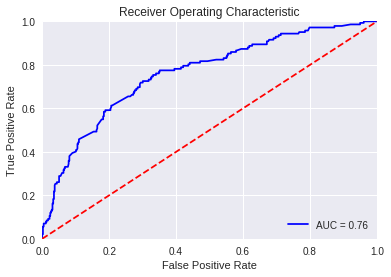

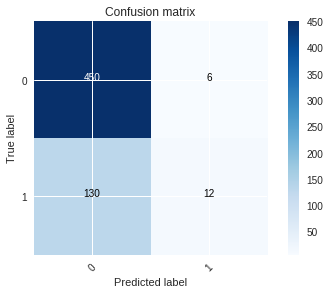

In [76]:
# All plots for training
report(tr_pred_y,tr_y,tr_x,cvclf)

The accuracy is 0.7733333333333333 



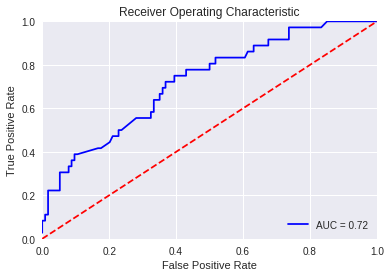

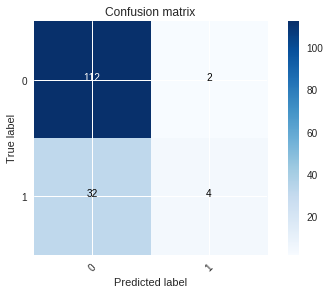

In [77]:
# All plots for test
report(te_pred_y,te_y,te_x,cvclf)

## (c) Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [0]:
lab_x = pd.DataFrame()
lab_y = pd.DataFrame()
unlab_x = pd.DataFrame()
unlab_y = pd.DataFrame()

all_train_data = tr_x
all_train_data['class'] = tr_y
gb = all_train_data.groupby('class')    
a = [gb.get_group(x) for x in gb.groups]
pos = a[1]
neg = a[0]
pos_lab = pos[:int(len(pos)/2)]
neg_lab = neg[:int(len(neg)/2)]
pos_unlab = pos[int(len(pos)/2):]
neg_unlab = neg[int(len(neg)/2):]
lab = pos_lab.append(neg_lab, ignore_index=True)
unlab = pos_unlab.append(neg_unlab, ignore_index=True)
lab_y['class'] = lab["class"]
lab_x = lab.drop(['class'],axis = 1)
unlab_y['class'] = unlab["class"]
unlab_x = unlab.drop(['class'],axis = 1)

### i. Train an L1-penalized SVM to classify the labeled data. Choose the penalty parameter using 5 fold cross validation.

In [79]:
svmclf1 = svm.LinearSVC(loss='l2', penalty='l1', dual=False)
params = {'C':[0.001,0.01, 0.1,1,10,100,1000]}
cvclf1 = GridSearchCV(svmclf1,params,cv = 5)
cvclf1.fit(lab_x, lab_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l1', random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
cvclf1.best_params_

{'C': 1}

### ii. Find the unlabeled data point that is the closest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and report the accuracy,AUC, ROC, and confusion matrix for the test set.

In [0]:
for i in range(len(unlab_x)):
    dist = pd.DataFrame()
    holder = pd.DataFrame(columns=['recent','freq','blood','time'])
    predicted = pd.DataFrame(columns = ['class'])
    dist = pd.DataFrame(cvclf1.decision_function(unlab_x)).abs().sort_values(by = [0],ascending = False)
    idx = dist.iloc[0,:].name
    holder.loc[idx] = unlab_x.iloc[idx]
    lab_x = lab_x.append( holder)
    predicted.loc[idx] = cvclf1.predict(holder)
    lab_y = lab_y.append(predicted)
    cvclf1.fit(lab_x, lab_y)

The accuracy is 0.78 



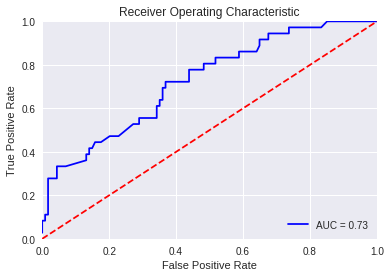

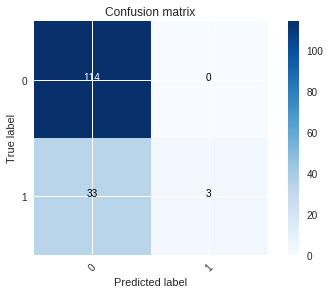

In [82]:
# All plots for test
te_pred_y = cvclf1.predict(te_x)
report(te_pred_y,te_y,te_x,cvclf1)

## (d) Unsupervised Learning: Run k-means algorithm on the whole training set.Ignore the labels of the data, and assume k = 2.

In [0]:
tr_x = tr_x.drop(['class'], axis = 1)
kmean = KMeans(n_clusters=2, random_state=0).fit(tr_x)

### i. Run the k-means algorithm multiple times. How do you make sure that the algorithm was not trapped in a local minimum?

In [0]:
for j in range(10):
  kmeans = KMeans(n_clusters=2, random_state=0).fit(tr_x)
  

By restaring or running it multiple times, one is able to reduce the chances of getting stuck in a local minima, but still it is not a viable full proof option.

An algorithm for partitioning (or clustering) N data points into  K disjoint subsets S_j containing N_j data points so as to minimize the sum-of-squares criterion

 J=sum_(j=1)^Ksum_(n in S_j)|x_n-mu_j|^2, 
 
where x_n is a vector representing the nth data point and mu_j is the geometric centroid of the data points in S_j. In general, the algorithm does not achieve a global minimum of J over the assignments. In fact, since the algorithm uses discrete assignment rather than a set of continuous parameters, the "minimum" it reaches cannot even be properly called a local minimum. Despite these limitations, the algorithm is used fairly frequently as a result of its ease of implementation.

The algorithm consists of a simple re-estimation procedure as follows. Initially, the data points are assigned at random to the K sets. For step 1, the centroid is computed for each set. In step 2, every point is assigned to the cluster whose centroid is closest to that point. These two steps are alternated until a stopping criterion is met, i.e., when there is no further change in the assignment of the data points

### ii. Compute the centers of the two clusters and and the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report accuracy and the confusion matrix.

The two centers are [0.14 0.19 0.19 0.65] and [0.13 0.05 0.05 0.19]
The index of the closest 30 points to the first center are [577, 405, 307, 169, 383, 486, 509, 374, 1, 243, 368, 507, 216, 69, 90, 26, 105, 387, 458, 491, 119, 227, 516, 113, 375, 4, 21, 270, 218, 538] This cluster will classify as 0    0.0
dtype: float64
The index of the closest 30 points to the second center are [564, 38, 134, 225, 224, 331, 496, 158, 131, 130, 175, 412, 45, 334, 333, 332, 331, 330, 245, 285, 41, 194, 244, 234, 233, 58, 57, 56, 220, 219] This cluster will classify as 0    0.0
dtype: float64
The accuracy is 0.7625418060200669 



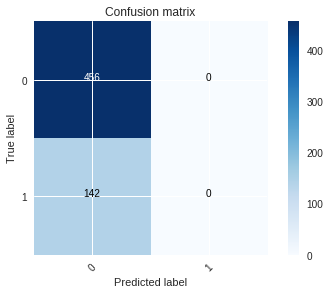

In [93]:
print("The two centers are",kmean.cluster_centers_[0],"and", kmean.cluster_centers_[1])

ccl1 = list()
ccl2 = list()
center1 = pd.DataFrame()
center2 = pd.DataFrame()
#pred_y = np.zeros((598), dtype=int)
#pred_y1 = np.zeros((150), dtype=int)
training_x = tr_x
for i in range(30):
    closest = 0
    closest, _ = pairwise_distances_argmin_min(kmean.cluster_centers_, training_x)
    ccl1.append(closest[0])
    ccl2.append(closest[1])
    if i is not 29:
      training_x = training_x.drop(training_x.index[closest[0]])
      training_x = training_x.drop(training_x.index[closest[1]])

#Majority Poll
center1 = tr_y.loc[ccl1]
center2 = tr_y.loc[ccl2]



print("The index of the closest 30 points to the first center are", ccl1,"This cluster will classify as",center1.mode())
print("The index of the closest 30 points to the second center are",ccl2,"This cluster will classify as",center2.mode())

pred_y = kmean.predict(tr_x)
# All plots for training
report(pred_y,tr_y,tr_x,"kmean")




### iii. Classify test data based on their proximity to the centers of the clusters.Report accuracy and confusion matrix for the test data.

The accuracy is 0.76 



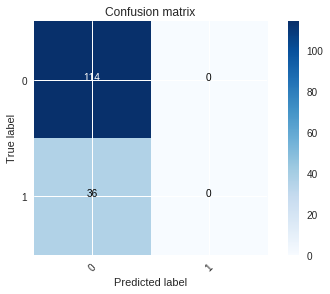

In [94]:
pred_y1 = kmean.predict(te_x)
# All plots for test
report(pred_y1,te_y,te_x,"kmean")

## (f) One expects that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

The accuracy for supervised learning for the training data was: 0.77
The accuracy for supervised learning for the testing data was: 0.72
The accuracy for semi-supervised learning for the testing data was: 0.37

Clearly K-Means is not a feasible classifier and the above mentioned assumption is true.


# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

## (a) Use k-means clustering on Anuran Calls (MFCCs) Data Set of Homework 4.Choose k automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots) or any other method you know.

In [0]:
# Impotring Data
frog_trx = pd.DataFrame()
frog_try = pd.DataFrame()
data = pd.read_csv('frog.csv', sep=",", header=0,skip_blank_lines=True)
data = data.drop(['RecordID'], axis = 1)
frog_try['family'] = data["Family"]
frog_try['genus'] = data["Genus"]
frog_try['species'] = data["Species"]
frog_trx = data.drop(["Family","Genus","Species"], axis = 1)

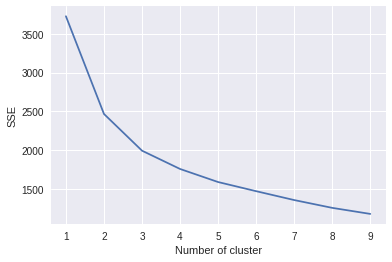

In [11]:
# Using "Elbow Method" to determine the best K for this problem by using SSE
#X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
#data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(frog_trx)
    frog_trx["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


The best K was found to be 5  by using the "Elbow Method".

## (b) In each cluster, determine which family is the majority by reading the true labels.Repeat for genus and species.

In [0]:
kmean = KMeans(n_clusters=5, random_state=0).fit(frog_trx)


In [50]:
fam   = list()
gen   = list()
spec  = list()
fam1  = list()
gen1  = list()
spec1 = list()
fam2  = list()
gen2  = list()
spec2 = list()
fam3  = list()
gen3  = list()
spec3 = list()
fam4  = list()
gen4  = list()
spec4 = list()

a = {i: np.where(kmean.labels_ == i)[0] for i in range(kmean.n_clusters)}

for i in a[0]:
  fam_clas = frog_try.loc[i]['family']
  fam.append(fam_clas)
  gen_clas = frog_try.loc[i]['genus']
  gen.append(gen_clas)
  spec_clas = frog_try.loc[i]['species']
  spec.append(spec_clas)

  
for j in a[1]:
  fam_clas = frog_try.loc[j]['family']
  fam1.append(fam_clas)
  gen_clas = frog_try.loc[j]['genus']
  gen1.append(gen_clas)
  spec_clas = frog_try.loc[j]['species']
  spec1.append(spec_clas)
  
for k in a[2]:
  fam_clas = frog_try.loc[k]['family']
  fam2.append(fam_clas)
  gen_clas = frog_try.loc[k]['genus']
  gen2.append(gen_clas)
  spec_clas = frog_try.loc[k]['species']
  spec2.append(spec_clas)
  
for l in a[3]:
  fam_clas = frog_try.loc[l]['family']
  fam3.append(fam_clas)
  gen_clas = frog_try.loc[l]['genus']
  gen3.append(gen_clas)
  spec_clas = frog_try.loc[l]['species']
  spec3.append(spec_clas)

for m in a[4]:
  fam_clas = frog_try.loc[m]['family']
  fam4.append(fam_clas)
  gen_clas = frog_try.loc[m]['genus']
  gen4.append(gen_clas)
  spec_clas = frog_try.loc[m]['species']
  spec4.append(spec_clas)
  
  
#modes = 
print(mode(fam),mode(gen),mode(spec),mode(fam1),mode(gen1),mode(spec1),mode(fam2),mode(gen2),mode(spec2),mode(fam3),mode(gen3),mode(spec3),mode(fam4),mode(gen4),mode(spec4))

ModeResult(mode=array(['Leptodactylidae'], dtype='<U15'), count=array([2515])) ModeResult(mode=array(['Adenomera'], dtype='<U13'), count=array([2514])) ModeResult(mode=array(['AdenomeraHylaedactylus'], dtype='<U22'), count=array([2514])) ModeResult(mode=array(['Leptodactylidae'], dtype='<U15'), count=array([959])) ModeResult(mode=array(['Adenomera'], dtype='<U13'), count=array([956])) ModeResult(mode=array(['AdenomeraHylaedactylus'], dtype='<U22'), count=array([956])) ModeResult(mode=array(['Hylidae'], dtype='<U15'), count=array([732])) ModeResult(mode=array(['Hypsiboas'], dtype='<U13'), count=array([520])) ModeResult(mode=array(['HypsiboasCordobae'], dtype='<U22'), count=array([498])) ModeResult(mode=array(['Hylidae'], dtype='<U15'), count=array([1196])) ModeResult(mode=array(['Hypsiboas'], dtype='<U13'), count=array([1014])) ModeResult(mode=array(['HypsiboasCordobae'], dtype='<U22'), count=array([584])) ModeResult(mode=array(['Leptodactylidae'], dtype='<U15'), count=array([586])) Mod

LABEL : Family

    Cluster_1 Majority: Leptodactylidae

    Cluster_2 Majority: Leptodactylidae 
    
    Cluster_3 Majority: Hylidae
    
    Cluster_4 Majority: Hylidae
    
    Cluster_5 Majority: Leptodactylidae

LABEL : Genus

    Cluster_1 Majority: Adenomera

    Cluster_2 Majority: Adenomera
    
    Cluster_3 Majority: Hypsiboas
    
    Cluster_4 Majority: Hypsiboas
    
    Cluster_5 Majority: Adenomera

LABEL : Species

    Cluster_1 Majority: AdenomeraHylaedactylus

    Cluster_2 Majority: AdenomeraHylaedactylus
    
    Cluster_3 Majority: HypsiboasCordobae
    
    Cluster_4 Majority: HypsiboasCordobae
    
    Cluster_5 Majority: AdenomeraHylaedactylus

## (c) Now for each cluster you have a majority label triplet (family, genus, species).Calculate the average Hamming distance between the true labels and the labels assigned by clusters.

In [23]:
pred_dict = {'family':{0:'Leptodactylidae',1:'Leptodactylidae',2:'Hylidae',3:'Hylidae',4:'Leptodactylidae'},'genus':{0:'Adenomera',1:'Adenomera',2:'Hypsiboas',3:'Hypsiboas',4:'Adenomera'},'species':{0:'AdenomeraHylaedactylus',1:'AdenomeraHylaedactylus',2:'HypsiboasCinerascens',3:'HypsiboasCinerascens',4:'AdenomeraHylaedactylus'}}
pred_dict

{'family': {0: 'Leptodactylidae',
  1: 'Leptodactylidae',
  2: 'Hylidae',
  3: 'Hylidae',
  4: 'Leptodactylidae'},
 'genus': {0: 'Adenomera',
  1: 'Adenomera',
  2: 'Hypsiboas',
  3: 'Hypsiboas',
  4: 'Adenomera'},
 'species': {0: 'AdenomeraHylaedactylus',
  1: 'AdenomeraHylaedactylus',
  2: 'HypsiboasCinerascens',
  3: 'HypsiboasCinerascens',
  4: 'AdenomeraHylaedactylus'}}

In [0]:
class_columns = frog_try.columns
dist = {}
for p in range(5):
  temp_index=[]
  pred = []
  for idx,val in enumerate(kmean.labels_):
    if p == val:
      temp_index.append(idx)
  for column in class_columns:
      pred.append(pred_dict[column].get(p))
      tru_val = [list(frog_try.loc[i,class_columns]) for i in temp_index]
  
  dist.update({p:hamming_score(predicted = pred, y_true = tru_val)})
    
    

In [25]:
dist

{0: 0.9765478424015009,
 1: 0.11770298535843296,
 2: 0.032614704256495396,
 3: 0.027201475334255407,
 4: 0.01813856675587272}

# 3. ISLR 10.7.2

2. Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by

0.3 0.4 0.7
0.3 0.5 0.8
0.4 0.5 0.45
0.7 0.8 0.45

For instance, the dissimilarity between the first and second observations
is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.
(a) On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observations
using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.
414 10. Unsupervised Learning
(b) Repeat (a), this time using single linkage clustering.
(c) Suppose that we cut the dendogram obtained in (a) such that
two clusters result. Which observations are in each cluster?
(d) Suppose that we cut the dendogram obtained in (b) such that
two clusters result. Which observations are in each cluster?
(e) It is mentioned in the chapter that at each fusion in the dendrogram,
the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same

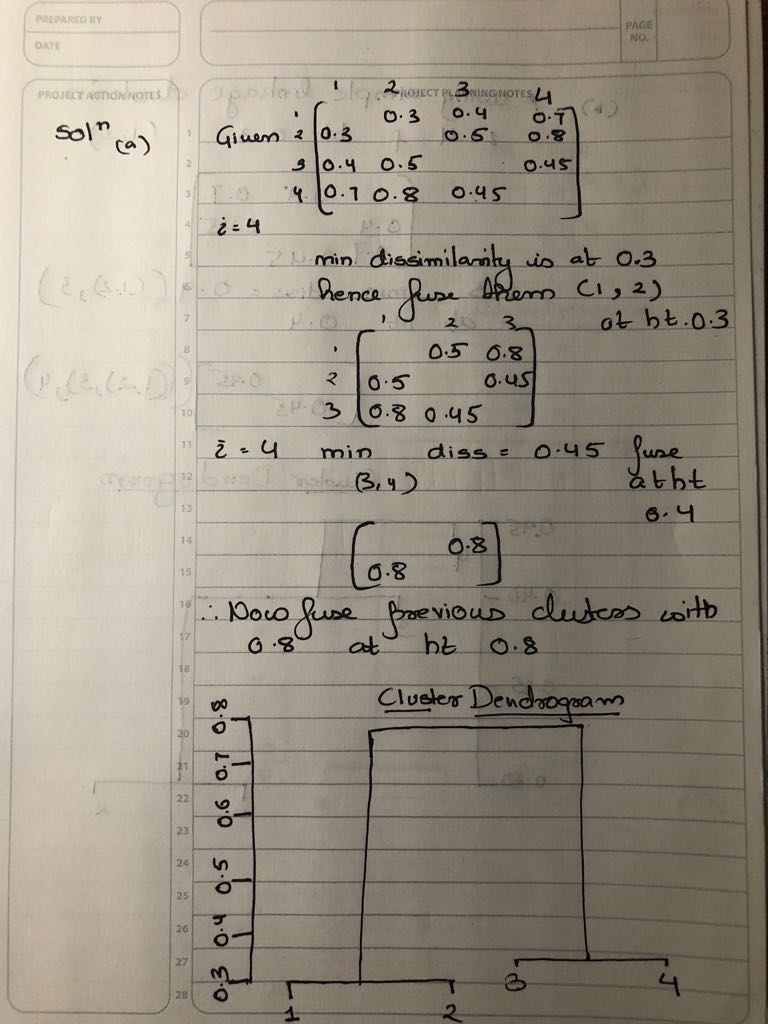

In [39]:
Image(filename='img1.jpeg') 

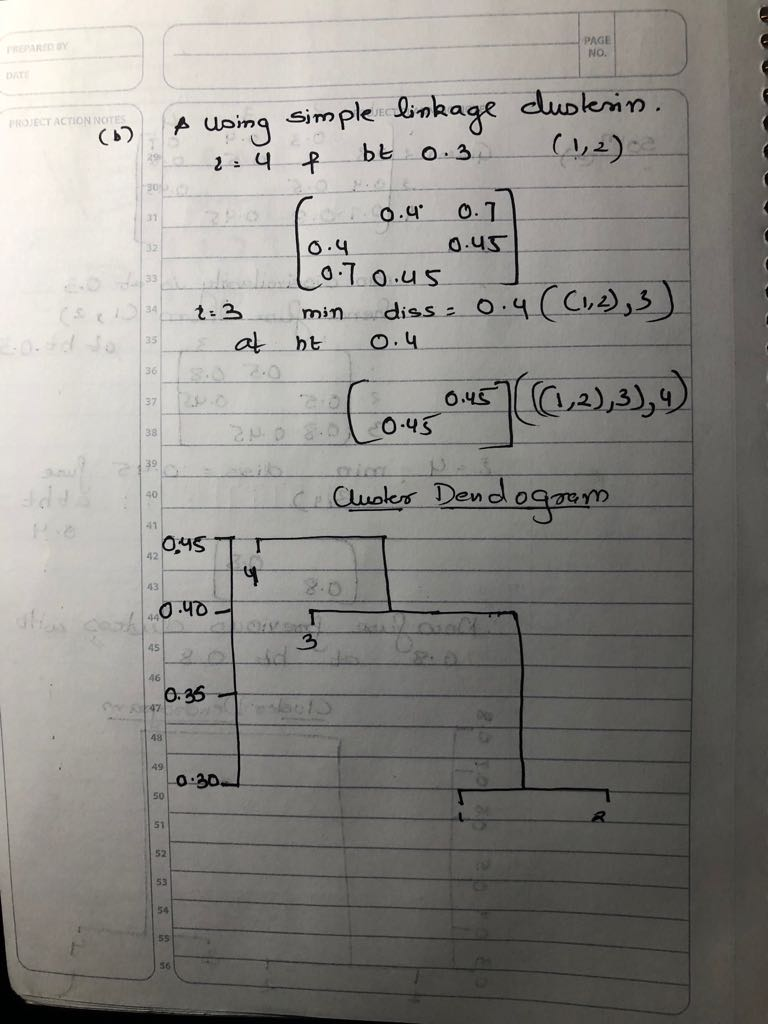

In [40]:
Image(filename='img2.jpeg') 

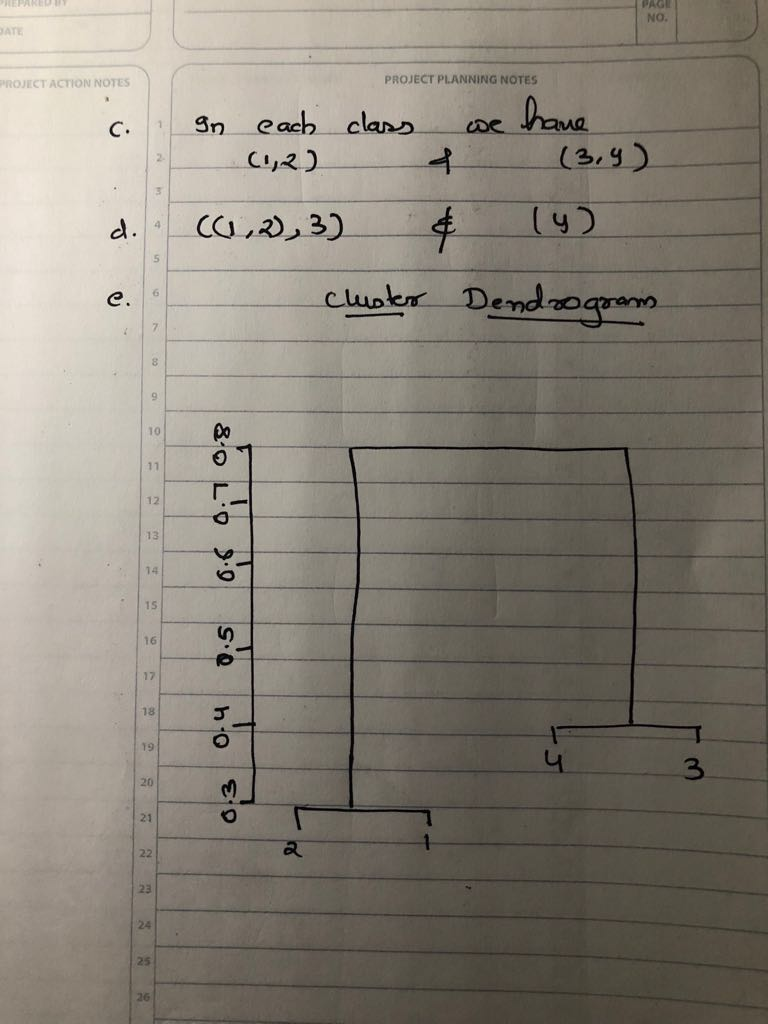

In [41]:
Image(filename='img3.jpeg') 

### Note: 1: Here we are using k-means as a classifier. The closest 30 data points to each center are labeled by experts, so as to use k-means for classification. Obviously, this is a naive approach